#1. Text Preprocessing

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df=pd.read_csv("/content/amazon_reviews.csv",sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
df["reviewText"]

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [5]:
df["reviewText"]=df["reviewText"].str.lower()#bütün texti kücük harflere dönüstürelim>>>Normalization
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

#Noktalama Isaretleri (Punctuations)

In [6]:
#burada noktalama isaretlerini silecegiz

In [7]:
#burada noktalama isaretlerini gördügü yerde bunu bosluk ile degistirmesini söylecegiz
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","")
df["reviewText"]

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [8]:
#bu noktalama isaretleri veya büyük/kücük harf anlam itibariyle birsey ifade etmedigi icin bunlar bir ölcüm problemi olarak geliyor
#bundan dolayi bu dönsüm yapildi

#Numbers

In [9]:
#burada sayilardan kurtulmaya calisacagiz.

In [10]:
df["reviewText"]=df["reviewText"].str.replace("\d","")#\d isareti sayilari ifade eder bunu bosluk ile degistirdik
df["reviewText"]

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

#Stop Words

In [11]:
#tek basina herhangi bir anlami olmayan the/for /of gibi eklemelerin veriden cikarilmasi

In [12]:
import nltk

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.stem.snowball import stopwords
stop_Words=stopwords.words("english")

In [15]:
stop_Words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
#yukaridaki islemi kod ile yapma
df["reviewText"]=df["reviewText"].apply(lambda x:" ".join(x for x in str(x).split() if x not in stop_Words))
df["reviewText"]

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

#Rare Words(Nadir gecen kelimeler)

In [17]:
temp_df=pd.Series(" ".join(df["reviewText"]).split()).value_counts()#hangi kelimeden kactane gectigini burda yazdiriyoruz
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Length: 9701, dtype: int64

In [18]:
drops=temp_df[temp_df<=1]
drops

conclusionmy       1
mbsbuy             1
flimsier           1
disappointedtry    1
priceokay          1
                  ..
sharper            1
cheapos            1
gate               1
measuring          1
stealwould         1
Length: 5612, dtype: int64

In [19]:
df["reviewText"]=df["reviewText"].apply(lambda x:" ".join(x for x in str(x).split() if x not in drops))#bu yukarida yapilanlari burdan atalim
df["reviewText"]

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

#Tokenization

In [20]:
#cumleleri parcalara ayirmak.Yani birimlestirmek.

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df["reviewText"].apply(lambda x:TextBlob(x).words).head()#cümleleri burada parcalara ayirdik

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

#Lemmatization >Kelimeleri köklerine ayirmak>Gözlük>Gözlükcü>Göz

In [23]:
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [24]:
df["reviewText"]=df["reviewText"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["reviewText"]

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

#Metin Görsellestirme

In [25]:
#metinlerdeki kelimelerin frekanslarini olusturduktan sonra bunlari istenilen sekilde görsellestirebiliriz.

In [26]:
tf=df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf#bütün kelimelerin essiz olanlarin sayisi cikarildi

,index,0
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00
...,...,...
3683,pureview,3.00
3684,laptoptablet,2.00
3685,employee,2.00
3686,sandisksequential,2.00


In [27]:
tf.columns=["words","tf"]

In [28]:
tf.sort_values("tf", ascending=False)  #azalan sekilde siralmasi yapildi

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


#Sutun Grafik(Bar Plot) Olusturulmasi


In [29]:
tf[tf["tf"]>500]

,words,tf
0,issue,609.00
2,device,584.00
7,phone,1909.00
8,memory,1378.00
14,work,2044.00
26,note,514.00
27,card,5537.00
33,well,677.00
36,one,1120.00
39,gb,1756.00


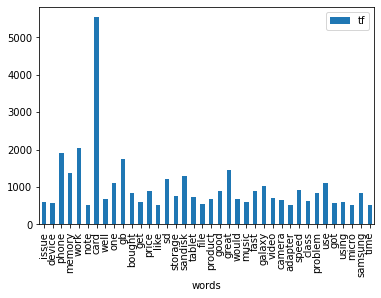

In [30]:
tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.show()

#Kelime Bulutu (Word Cloud)

In [31]:
text=" ".join(i for i in df.reviewText)
text

'issue purchased device worked advertised never much phone memory since download lot stuff brainer work expected higher capacity think made bit earlier version paint look clean think worked gb card went south one held pretty well since note update ive month zero issue since transferred note note card reliable bought retail packaging arrived legit envelope version asian like picture show arrived quickly bought retail packaging htc one lg optimus card working order probably best price youll get nice sd card mini storage doesnt anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks phone never skip beat file transfer speedy corruption issue memory issue would expect sandisk brand great card precious file slightly cheaper piece crap lose everything spending extra couple buck trusted product go good qa hard believe affordable digital become gb device one quarter postage stamp would le generation picked po

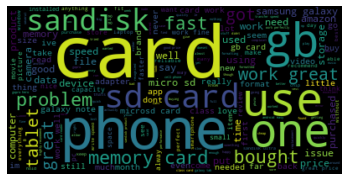

In [32]:
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

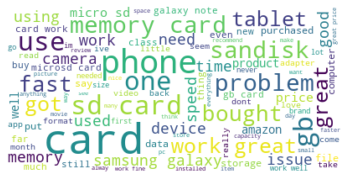

In [33]:
wordcloud=WordCloud(max_font_size=50,
                    max_words=100,
                    background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Sablonlara Göre Word Cloud

In [34]:
solution_mask=np.array(Image.open("/content/solution.png"))

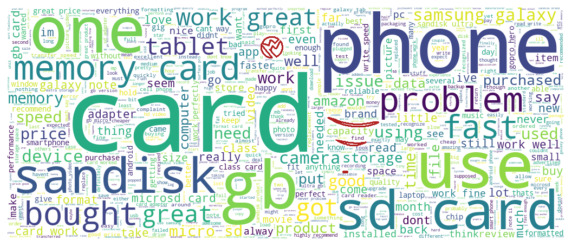

In [35]:
wc=WordCloud(mask=solution_mask,
                    contour_width=3,
                    contour_color="firebrick",
                    max_words=1000,
                    background_color="white").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Duygu Durum Analizi(Sentiment Analysis)

In [36]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [37]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
sia=SentimentIntensityAnalyzer()

In [39]:
sia.polarity_scores("The film was awesome")
#compound sifirdan büyükse pozitig

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [40]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [41]:
df["reviewText"][0:10].apply(lambda x:sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [42]:
df["reviewText"][0:10].apply(lambda x:sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [43]:
df["polarity_score"]=df["reviewText"].apply(lambda x:sia.polarity_scores(x)["compound"])
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",bought sandisk gb class use htc inspire month ...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used capability samsung galaxy note greatly ex...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable come optional adapter...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",good amount space stuff want fit gopro say,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69


# Duygu Durum Modelleme(Sentiment Modeling)

##Fetaure Enineering

In [44]:
df["reviewText"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [45]:
df["sentiment_label"]=df["reviewText"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

In [46]:
df["sentiment_label"].value_counts()

pos    3944
neg     971
Name: sentiment_label, dtype: int64

In [47]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [48]:
df["sentiment_label"]=LabelEncoder().fit_transform(df["sentiment_label"])
df["sentiment_label"]

0       0
1       0
2       1
3       1
4       1
       ..
4910    1
4911    1
4912    1
4913    1
4914    1
Name: sentiment_label, Length: 4915, dtype: int64

In [49]:
y=df["sentiment_label"]
X=df["reviewText"]

#Countvectors >kelimeleri numeric halleriyle ele almak

In [50]:
# Count Vectors_Frekans temsiller
#TF-IDF Vectors:normalize edilmis frekans temsiller
#Word Embeddings(Word2Vec,Glove,BERT vs)

In [51]:
#countvectors>kelimelerin kacar defa gectigini cikarmak

In [52]:
#words
##Kelimelerin nümerik temsilleri

#characters
##Karakterlerin numerik temsilleri

#ngram
a="""Bu örnegi anlasilabilmesi icin daha uzun bir metin üzerinden gösterecegim. N_graml'öar birlikte kullanilan kelimelerin
kombinasyonlarini gösterir ve feature üretmek icin kullanilir """

In [53]:
TextBlob(a).ngrams(3)#3lü kombinasyonlar olusturmak

[WordList(['Bu', 'örnegi', 'anlasilabilmesi']),
 WordList(['örnegi', 'anlasilabilmesi', 'icin']),
 WordList(['anlasilabilmesi', 'icin', 'daha']),
 WordList(['icin', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'gösterecegim']),
 WordList(['üzerinden', 'gösterecegim', "N_graml'öar"]),
 WordList(['gösterecegim', "N_graml'öar", 'birlikte']),
 WordList(["N_graml'öar", 'birlikte', 'kullanilan']),
 WordList(['birlikte', 'kullanilan', 'kelimelerin']),
 WordList(['kullanilan', 'kelimelerin', 'kombinasyonlarini']),
 WordList(['kelimelerin', 'kombinasyonlarini', 'gösterir']),
 WordList(['kombinasyonlarini', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'icin']),
 WordList(['üretmek', 'icin', 'kullanilir'])]

In [54]:
#count vektors
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
corpus=["This is the first document.","This document is the second document.",
        "And this is the third one.","Is this the first document?"]
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [56]:
#word frekans
vectorizer=CountVectorizer()
X_c=vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [57]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [58]:
#n-gram frekans
vectorizer2=CountVectorizer(analyzer="word", ngram_range=(2,2))
X_n=vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [59]:
vectorizer2.get_feature_names()

['and this',
 'document is',
 'first document',
 'is the',
 'is this',
 'second document',
 'the first',
 'the second',
 'the third',
 'third one',
 'this document',
 'this is',
 'this the']

In [60]:
#simdi bunu kendi verimiz üzerinde deneyelim
vectorizer=CountVectorizer()
X_count=vectorizer.fit_transform(X)

In [61]:
vectorizer.get_feature_names()[10:15]

['access', 'accessed', 'accessible', 'accessing', 'accessory']

In [62]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#TF-IDF Yöntemi

In [63]:
#CountVector yönteminin ortaya cikarabilecegi bazi yanliliklari giderebilmek adina normalize edilmis kelime olusturma vektorüdür.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer=TfidfVectorizer()

In [66]:
X_tf_idf_word=tf_idf_word_vectorizer.fit_transform(X)

In [71]:
tf_idf_ngram_vectorizer=TfidfVectorizer(ngram_range=(2,3))
X_tf_idf_ngram=tf_idf_ngram_vectorizer.fit_transform(X)

#Sentiment Modeling

In [63]:
# 1.Text Preprocessing
# 2.Text Visualization
# 3.Sentiment Analysis
# 4.Feature Engineering
# 5.Sentiment Modeling<<<

In [ ]:
##########################
#Logistic Regression
##########################

In [72]:
log_model=LogisticRegression().fit(X_tf_idf_word,y)

In [76]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [81]:
new_review=pd.Series("this product is look good")#yeni bir yorum olsun ve bunun modelimizdeki degerlendirmesine bakalim

In [82]:
#yeni yorum suan string boyutunda bunu simdi vectöre dönüstürüp böyle sormamiz lazim modelimize
new_review=TfidfVectorizer().fit(X).transform(new_review)

In [92]:
new_review2=pd.Series("look at that shit very bad")#yeni bir yorum olsun ve bunun modelimizdeki degerlendirmesine bakalim
#yeni yorum suan string boyutunda bunu simdi vectöre dönüstürüp böyle sormamiz lazim modelimize
new_review2=TfidfVectorizer().fit(X).transform(new_review2)

In [83]:
log_model.predict(new_review)

array([1])

In [93]:
log_model.predict(new_review2)

array([0])

In [95]:
random_review=pd.Series(df["reviewText"].sample(1).values)
random_review

0    installed memory samsung tab inch tablet doesn...
dtype: object

In [96]:
new_reveiw=TfidfVectorizer().fit(X).transform(random_review)

In [97]:
log_model.predict(new_review)

array([1])

#Random Forests

In [99]:
#Count Vectors
rf_model=RandomForestClassifier().fit(X_count,y)
cross_val_score(rf_model,X_count,y,cv=5,n_jobs=-1).mean()#n_jobs=bütün islemcileri kullan

0.8406917599186166

In [101]:
#TF-IDF Word-Level
rf_model=RandomForestClassifier().fit(X_tf_idf_word,y)
cross_val_score(rf_model,X_tf_idf_word,y,cv=5,n_jobs=-1).mean()

0.8256358087487283

In [102]:
# TF-IDF N-GRAM
rf_model=RandomForestClassifier().fit(X_tf_idf_ngram,y)
cross_val_score(rf_model,X_tf_idf_ngram,y,cv=5,n_jobs=-1).mean()

0.7861648016276703

#Hiperparametre Optimizasyonu

In [111]:
rf_model=RandomForestClassifier(random_state=15)


In [112]:
rf_params={"max_depth":[8,None],
           "max_features":[7,"auto"],
           "min_samples_split":[2,5,8],
           "n_estimators":[100,200]}
#burada kurulacak model icin en iyi parametrelerin ayarlanmasi

In [113]:
rf_best_grid=GridSearchCV(rf_model,
                          rf_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=1).fit(X_count,y)#verbose=raporlama yapilsin mi
#modelime en uygun paramtrelerin hangisi oldugun söyle

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [114]:
rf_best_grid.best_params_#en iyi parametreler

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [116]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_, random_state=15).fit(X_count,y)

In [117]:
cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()

0.8384537131230927

In [ ]:
##simdi biraz daha parametre optimizasyonu ile daha iyi bir sonuc alabilir miyiz ona bakalim.

In [120]:
rf_params={"max_depth":[5,8,15,20,None],
           "max_features":[5,7,15,20,"auto"],
           "min_samples_split":[2,5,8,12],
           "n_estimators":[100,200,300,500]}
#burada kurulacak model icin en iyi parametrelerin ayarlanmasi
rf_best_grid=GridSearchCV(rf_model,
                          rf_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=1).fit(X_count,y)#verbose=raporlama yapilsin mi
#modelime en uygun paramtrelerin hangisi oldugun söyle

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [121]:
rf_best_grid.best_params_#en iyi parametreler

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 500}

In [122]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_, random_state=15).fit(X_count,y)

In [123]:
cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()

0.839471007121058